<a href="https://colab.research.google.com/github/kevinmatsui/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applying multiple clustering algorithms to data set


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import kmeans_plusplus
import collections
import copy

In [ ]:
def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return 

In [ ]:
class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

In [ ]:
def read_data(file_name, seperator=','):
    data = []
    with open(file_name) as input_file:
        for row in input_file.readlines():
            temp = row.split()
            temp.pop(0)
            nparr = np.array(temp)

            data.append(nparr.astype(np.float))
    return data



dataset = read_data("C1.txt", seperator=' ')

N = len(dataset)
K = 3
M = 0

agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(dataset, K, M)
agg_hierarchical_clustering.run_algorithm()
agg_hierarchical_clustering.print()

Cluster: 0
    [0.7234 0.125 ]
    [0.9 0.2]
    [0.5   0.123]
    [ 0.3846154 -0.6884388]
    [ 0.5384615 -0.7074192]
    [ 0.6923077 -0.6859809]
    [ 0.2307692 -0.6345016]
    [ 0.8461538 -0.6186618]
    [ 0.0769231 -0.5510696]
    [-0.0769231 -0.4436049]
    [ 1.  -0.5]
    [-0.2307692 -0.3175694]
    [-0.3846154 -0.1784251]
    [-0.5384615 -0.031634 ]
    [-1.   0.4]
    [-0.8461538  0.2630405]
    [-0.6923077  0.1173418]
Cluster: 1
    [-0.75     2.23129]
    [-0.77       1.7523932]
Cluster: 2
    [-0.2     -1.51712]
    [-0.12    -1.38923]


<ipython-input-21-4ab6d743c2d8>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.append(nparr.astype(np.float))


In [ ]:
df = pd.read_csv("C1.txt", header=None, delim_whitespace=True, names='Col_a Col_b Col_c'.split(' '))
df = df.drop(['Col_a'], axis=1)

In [ ]:
print(df)
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="single")
clustering_model.fit(df)
labels = clustering_model.labels_
print(labels)

clustering_model = AgglomerativeClustering(n_clusters=3, linkage="complete")
clustering_model.fit(df)
labels = clustering_model.labels_
print(labels)

       Col_b     Col_c
0  -0.750000  2.231290
1  -0.770000  1.752393
2  -0.200000 -1.517120
3  -0.120000 -1.389230
4   0.500000  0.123000
5   0.723400  0.125000
6   0.900000  0.200000
7  -1.000000  0.400000
8  -0.846154  0.263041
9  -0.692308  0.117342
10 -0.538462 -0.031634
11 -0.384615 -0.178425
12 -0.230769 -0.317569
13 -0.076923 -0.443605
14  0.076923 -0.551070
15  0.230769 -0.634502
16  0.384615 -0.688439
17  0.538462 -0.707419
18  0.692308 -0.685981
19  0.846154 -0.618662
20  1.000000 -0.500000
[1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0]


<ipython-input-101-b15967ce19aa>:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.append(nparr.astype(np.float))


[array([-2.7694973,  2.6778586]), array([-2.7039693,  2.5350218]), array([-2.4496287,  3.7726618]), array([-3.0914262,  3.7666043]), array([-3.6024423,  2.756505 ]), array([-3.1501035,  2.2899405]), array([-3.8721481,  2.7821201]), array([-4.4066625,  3.5119542]), array([-1.9184512,  2.6897197]), array([-2.6501665,  2.8594576]), array([-3.4072859,  2.2334514]), array([-4.1114628,  2.2214538]), array([-4.0520705,  1.6843888]), array([-2.4740575,  3.6777361]), array([-2.3647504,  3.3010651]), array([-1.7310564,  4.6641768]), array([-3.5331894,  2.6549011]), array([-2.2467333,  3.6223586]), array([-3.5056169,  2.997055 ]), array([-3.4094362,  2.8231793]), array([-3.615908 ,  2.2078621]), array([-2.9382739,  2.5466521]), array([-2.1966817,  2.3696945]), array([-2.5060013,  2.2981264]), array([-3.3849358,  3.8002217]), array([-4.4986889,  2.7670741]), array([-4.5182835,  2.260337 ]), array([-3.1131061,  2.1970125]), array([-2.890406 ,  3.1353717]), array([-4.4314689,  2.2908055]), array([-2

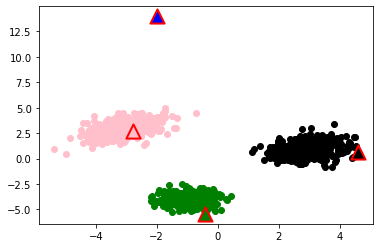

In [ ]:
def Gonzales(X, k):
  assignment = [0]*len(X)
  sites = []
  sites.append(X[0])
  for i in range(1,k,1):
    M = 0
    sites.append(X[0])
    for j in range(len(X)):
      distance = math.dist(X[j], sites[assignment[j]])
      if distance > M:
        M = distance
        sites[i] = X[j]
    for j in range(len(X)):
      distance = math.dist(X[j], sites[assignment[j]])
      d2 = math.dist(X[j], sites[i])
      if distance > d2:
        assignment[j] = i
  return sites, assignment


data = []
with open("C2.txt") as input_file:
  for row in input_file.readlines():
      temp = row.split()
      temp.pop(0)
      nparr = np.array(temp)
      data.append(nparr.astype(np.float))
print(data)
t = Gonzales(data,4)
print(t[0])
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
site = np.array(t[0])
siteass = np.array(t[1])

maxd = 0
m = 0
sum = 0
for i in range(len(data)):
  dist = math.dist(data[i], site[siteass[i]])
  sum+= dist**2
  if dist > maxd:
    maxd = dist
    m = i
  if siteass[i] == 0:
    cluster1.append(data[i])
  if siteass[i] == 1:
    cluster2.append(data[i])
  if siteass[i] == 2:
    cluster3.append(data[i])
  if siteass[i] == 3:
    cluster4.append(data[i])
print("4 center cost")
print(str(m+1))
print(maxd)
avg = sum/len(data)
avg = avg**0.5
print("4 means cost")
print(avg)
cluster1x = [row[0] for row in cluster1]
cluster2x = [row[0] for row in cluster2]
cluster3x = [row[0] for row in cluster3]
cluster4x = [row[0] for row in cluster4]

cluster1y = [row[1] for row in cluster1]
cluster2y = [row[1] for row in cluster2]
cluster3y = [row[1] for row in cluster3]
cluster4y = [row[1] for row in cluster4]

site1 = site[0]
site2 = site[1]
site3 = site[2]
site4 = site[3]
site1x = site1[0]
site2x = site2[0]
site3x = site3[0]
site4x = site4[0]

site1y = site1[1]
site2y = site2[1]
site3y = site3[1]
site4y = site4[1]


plt.scatter(cluster1x, cluster1y, c ="pink")
plt.scatter(cluster2x, cluster2y, c ="blue")
plt.scatter(cluster3x, cluster3y, c ="green")
plt.scatter(cluster4x, cluster4y, c ="black")
plt.scatter(site1x, site1y, c ="pink",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
plt.scatter(site2x, site2y, c ="blue",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
plt.scatter(site3x, site3y, c ="green",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
plt.scatter(site4x, site4y, c ="black",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
indexes = [0,1028,1000,342]
indexes.sort()

In [ ]:
matrix = np.loadtxt('C2.txt', usecols=range(3))
matrix = np.delete(matrix, 0, 1)
print(matrix)
copysite = site

meanscosts = []
counter = 0
for x in range(20):
  centers, indices = kmeans_plusplus(matrix, n_clusters=4)
  assignment = []
  print(centers)
  copy = indices.copy()
  copy.sort()
  if (copy == indexes):
    counter+= 1
  for i in range(len(matrix)):
    distances = []
    distances.append(math.dist(matrix[i], centers[0]))
    distances.append(math.dist(matrix[i], centers[1]))
    distances.append(math.dist(matrix[i], centers[2]))
    distances.append(math.dist(matrix[i], centers[3]))
    arr = np.array(distances)
    assignment.append(np.argmin(distances))

  sum = 0
  for i in range(len(matrix)):
    dist = math.dist(matrix[i], centers[assignment[i]])
    sum+= dist**2
  avg = sum/len(matrix)
  avg = avg**0.5
  meanscosts.append(avg)
x = [0.90,0.95,1,1.05,1.10,1.20,1.25,1.3,1.35]
yax = []
print(meanscosts)
for y in range(len(x)):
  comp = x[y]
  counts = 0
  for c in range(len(meanscosts)):
    if meanscosts[c] <= comp:
      counts+=1
  yax.append(counts/20)

print(yax)
print(counter)

[[-2.7694973  2.6778586]
 [-2.7039693  2.5350218]
 [-2.4496287  3.7726618]
 ...
 [-0.9127945 -4.1640719]
 [-1.6710883 -4.8366017]
 [-2.        14.       ]]
[[ 3.2732893  2.0349811]
 [-1.3643871 -3.9846606]
 [-3.7136464  3.3802834]
 [ 2.0274161  0.3262685]]
[[ 3.3645026  1.1653319]
 [-3.1917177  2.5814576]
 [-1.0787582 -3.9978472]
 [ 1.8444078  0.3924216]]
[[-0.3676059 -3.9099399]
 [-2.6501665  2.8594576]
 [ 2.6187389  0.694966 ]
 [-0.6746624 -4.3286152]]
[[-2.3950628  3.0198238]
 [-0.3715133 -4.1699756]
 [ 2.637505   0.0864233]
 [ 2.58055    1.0249431]]
[[-1.2161528 -4.5730747]
 [-2.1680441  2.5771878]
 [ 2.3566026  0.7108981]
 [-3.5256121  2.9818435]]
[[ 1.716571   1.1255354]
 [-2.8599775  3.0851282]
 [-0.5798404 -3.687083 ]
 [-0.8519685 -4.3102055]]
[[ 2.5746655  0.6635445]
 [-1.1604382 -4.5628266]
 [-3.5251633  2.1630314]
 [-2.4740575  3.6777361]]
[[-4.048796   1.9349768]
 [-0.871559  -3.9679031]
 [ 3.1351929  1.1074987]
 [ 1.5219476 -0.1358544]]
[[ 4.5428559  1.2110839]
 [-2.910007